# CS590W Final Project


#  Detection of Arrhythmia using Electrocardiogram Features


# Group Members: Alan Tang, Arham Choraria, Shaham Zahir



In [1]:
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

# Set seaborn visual style
sns.set()
sns.set_context('talk')
plt.rcParams["patch.force_edgecolor"] = False  # Turn off histogram borders

# Apply speed patch for scikit learn before imports
from sklearnex import patch_sklearn
patch_sklearn()

# metrics are used to find accuracy or error
from sklearn import metrics 

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import (PrecisionRecallDisplay,precision_recall_curve)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

rng = np.random.RandomState(seed = 590)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Load Data

In [2]:
data = pd.read_csv('arrhythmia_cleaned.csv')

Here we import the dataset and split the 420 rows into training, data and validation sets. The 'ARR_GROUP' column is the classification of arrhythmia, Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones.

In [3]:
#remove all rows with 'ARR_GROUP' as 16 because they are unclassified
data = data[data['ARR_GROUP'] != 16]

#change all rows with 'ARR_GROUP' between 2-15 to be 0
data.loc[data["ARR_GROUP"] != 1] = 0

X = data.iloc[:, :-1]
y = data.iloc[:, 278]

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

print(X.columns)
print(data)

Index(['AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'QRS_DUR', 'PR_INT', 'QT_INT',
       'T_INT', 'P_INT', 'QRS_ANG',
       ...
       'V6_JJ_AMP', 'V6_Q_AMP', 'V6_R_WAVE', 'V6_S_WAVE', 'V6_R'_WAVE',
       'V6_S'_WAVE', 'V6_P_WAVE', 'V6_T_WAVE', 'V6_QRSA', 'V6_QRSTA'],
      dtype='object', length=278)
     AGE  SEX  HEIGHT  WEIGHT  QRS_DUR  PR_INT  QT_INT  T_INT  P_INT  QRS_ANG  \
0      0    0       0       0        0       0       0      0      0        0   
1      0    0       0       0        0       0       0      0      0        0   
2      0    0       0       0        0       0       0      0      0        0   
3     55    0     175      94      100     202     380    179    143       28   
4      0    0       0       0        0       0       0      0      0        0   
..   ...  ...     ...     ...      ...     ...     ...    ...    ...      ...   
415   53    1     160      70       80     199     382    154    117      -37   
416    0    0       0       0        0       0       0  

# K-Nearest-Neighbor Model

**KNN with 21 neighbors**

[[28  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

[0 1]


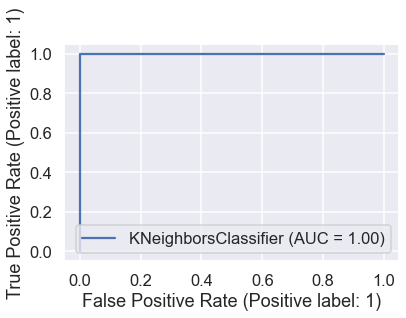

ACCURACY OF THE MODEL:  1.0


In [4]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(np.unique(y))

#ROC Curve
metrics.plot_roc_curve(classifier, X_test, y_test)
plt.show()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predict))



**KNN precision recall plot with 21 neighbors**

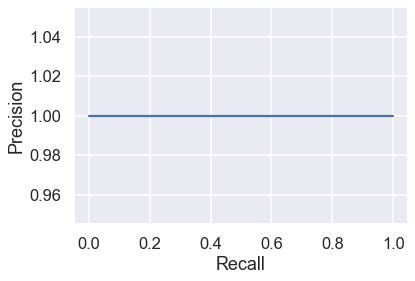

In [5]:
precision, recall, _ = precision_recall_curve(y_test, y_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


**KNN with 5 neighbors**

In [6]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predict))

[[28  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

ACCURACY OF THE MODEL:  1.0


**KNN precision recall plot with 5 neighbors**

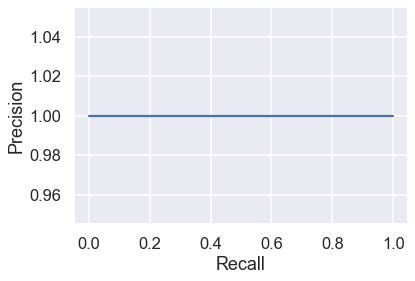

In [7]:
precision, recall, _ = precision_recall_curve(y_test, y_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

**KNN with 10 neighbors**

In [8]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predict))

[[28  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

ACCURACY OF THE MODEL:  1.0


**KNN precision recall plot with 10 neighbors**

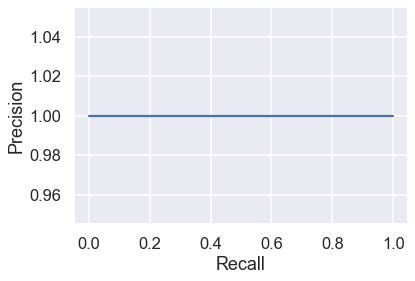

In [9]:
precision, recall, _ = precision_recall_curve(y_test, y_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

# Decision Trees

Accuracy: 1.0


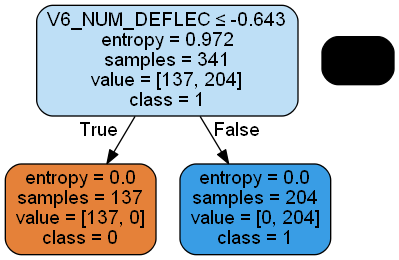

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=49, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arr.png')
Image(graph.create_png()) 


**Decision Tree Precision Recall Plot**

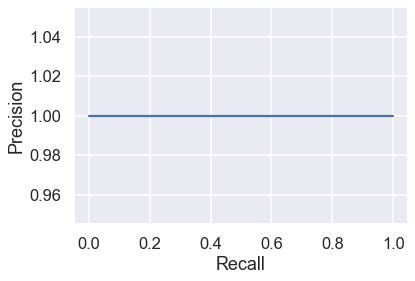

In [11]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

# Random Forest Model

In [12]:
# creating a Random Forest classifier
classifier = RandomForestClassifier(n_estimators = 20, random_state=0) 
 
# Training the model on training set
classifier.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = classifier.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#print(classifier.feature_importances_)
#print(len(X.columns))

forest = pd.DataFrame()
forest['Features'] = X.columns
forest['Importance'] = classifier.feature_importances_
fixed = forest[forest['Importance'] > 0]
sorted = fixed.sort_values('Importance', ascending=False)
print(sorted)

ACCURACY OF THE MODEL:  1.0
          Features  Importance
3           WEIGHT    0.150000
151  V6_NUM_DEFLEC    0.100000
147     V6_R_WIDTH    0.100000
123     V4_R_WIDTH    0.050000
240      V3_R_WAVE    0.050000
226        V1_QRSA    0.050000
135     V5_R_WIDTH    0.050000
124     V4_S_WIDTH    0.050000
115  V3_NUM_DEFLEC    0.050000
19   DI_NUM_DEFLEC    0.050000
13      HEART_RATE    0.050000
8            P_INT    0.050000
5           PR_INT    0.050000
245      V3_T_WAVE    0.050000
166        DI_QRSA    0.047581
100     V2_S_WIDTH    0.047086
4          QRS_DUR    0.002914
236        V2_QRSA    0.002419


**Random Forest Precision Recall Plot**

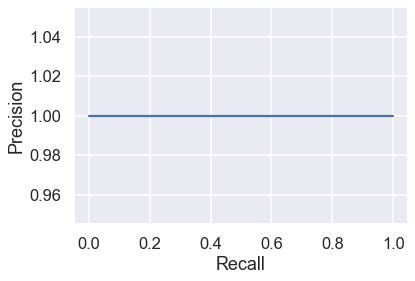

In [13]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()